In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
def load_data(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        for image_name in os.listdir(os.path.join(data_dir, label)):
            image_path = os.path.join(data_dir, label, image_name)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (48, 48))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
X, y = load_data('C:/Emotion Detection/DATA_SETS/images/train') #RAFDB
X = X / 255.0  # Normalize images

In [6]:
# Encode Labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes=7)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))  # 7 classes 
model.compile(optimizer=Adam(),  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

c:\Users\shams\anaconda3\envs\samenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,234,503 (16.15 MB)

 Trainable params: 4,234,503 (16.15 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 10,
    verbose=1,
    mode = 'auto',
    restore_best_weights = True)

In [11]:
hist = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val), callbacks=callback)

Epoch 1/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 167s 449ms/step - accuracy: 0.2326 - loss: 1.8419 - val_accuracy: 0.2749 - val_loss: 1.7870
Epoch 2/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 164s 454ms/step - accuracy: 0.2502 - loss: 1.7992 - val_accuracy: 0.3010 - val_loss: 1.7153
Epoch 3/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 165s 457ms/step - accuracy: 0.2864 - loss: 1.7240 - val_accuracy: 0.3754 - val_loss: 1.5808
Epoch 4/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 166s 460ms/step - accuracy: 0.3563 - loss: 1.6099 - val_accuracy: 0.4170 - val_loss: 1.4782
Epoch 5/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 152s 420ms/step - accuracy: 0.4013 - loss: 1.5172 - val_accuracy: 0.4531 - val_loss: 1.3963
Epoch 6/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 126s 348ms/step - accuracy: 0.4382 - loss: 1.4614 - val_accuracy: 0.4644 - val_loss: 1.3851
Epoch 7/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 134s 371ms/step - accuracy: 0.4514 - loss: 1.4116 - val_accuracy: 0.4918 - val_loss: 1.3042
Epoch 8/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 139s 384ms/step - accuracy: 

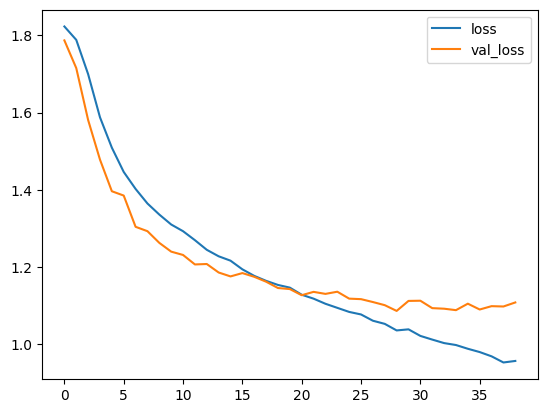

In [12]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], label ='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

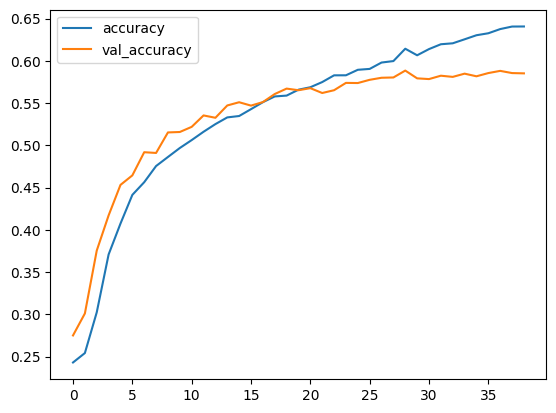

In [13]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], label ='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [14]:
import os
model.save(os.path.join('C:\Face Detection\Models','raf_db_2.h5'))

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\shams\AppData\Local\Temp\ipykernel_15652\1186479632.py:2: SyntaxWarning: invalid escape sequence '\F'
  model.save(os.path.join('C:\Face Detection\Models','raf_db_2.h5'))
